In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("../datasets/weather.csv")
df.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
5,6.2,16.9,0.0,5.8,8.2,SE,44.0,SE,E,20.0,...,57,1023.8,1021.7,7,5,10.9,14.8,No,0.2,No
6,6.1,18.2,0.2,4.2,8.4,SE,43.0,SE,ESE,19.0,...,47,1024.6,1022.2,4,6,12.4,17.3,No,0.0,No
7,8.3,17.0,0.0,5.6,4.6,E,41.0,SE,E,11.0,...,57,1026.2,1024.2,6,7,12.1,15.5,No,0.0,No
8,8.8,19.5,0.0,4.0,4.1,S,48.0,E,ENE,19.0,...,48,1026.1,1022.7,7,7,14.1,18.9,No,16.2,Yes
9,8.4,22.8,16.2,5.4,7.7,E,31.0,S,ESE,7.0,...,32,1024.1,1020.7,7,1,13.3,21.7,Yes,0.0,No


In [218]:
weather_df = []

for i in range(len(df) - 6):
    features = df["MaxTemp"][i:i+6]
    targets = df["MaxTemp"][i+6]
    weather_df.append(list(features) + [targets])


columns = [f"x{i+1}" for i in range(6)] + ["target"]
new_df = pd.DataFrame(weather_df , columns=columns)
new_df

,x1,x2,x3,x4,x5,x6,target
0,24.3,26.9,23.4,15.5,16.1,16.9,18.2
1,26.9,23.4,15.5,16.1,16.9,18.2,17.0
2,23.4,15.5,16.1,16.9,18.2,17.0,19.5
3,15.5,16.1,16.9,18.2,17.0,19.5,22.8
4,16.1,16.9,18.2,17.0,19.5,22.8,25.2
...,...,...,...,...,...,...,...
355,20.6,15.0,18.0,20.7,25.5,26.1,30.7
356,15.0,18.0,20.7,25.5,26.1,30.7,28.4
357,18.0,20.7,25.5,26.1,30.7,28.4,19.9
358,20.7,25.5,26.1,30.7,28.4,19.9,26.9


<AxesSubplot:xlabel='target', ylabel='Count'>

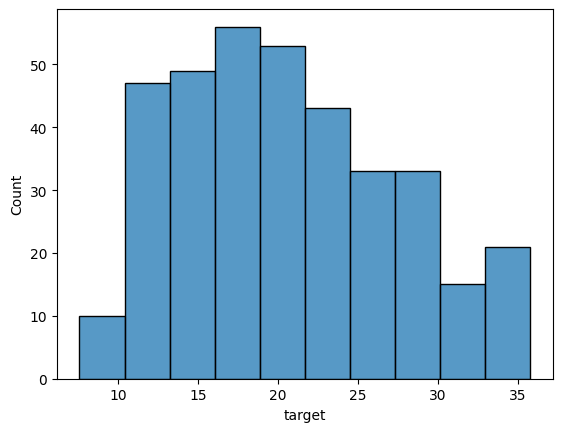

In [219]:
sns.histplot(new_df["target"])

<Figure size 1000x1000 with 0 Axes>

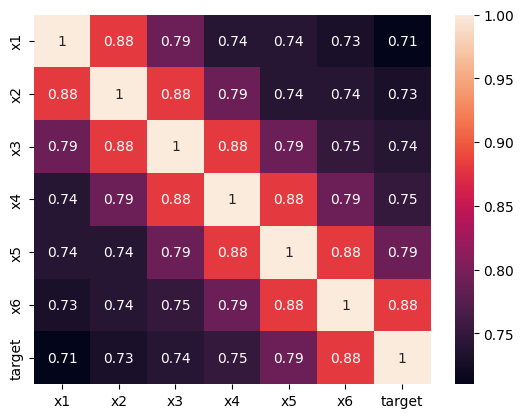

<Figure size 1000x1000 with 0 Axes>

In [220]:
c = new_df.corr().round(2)
sns.heatmap(c , annot=True)
plt.figure(figsize=(10 , 10))

In [221]:
data_x = new_df[["x1" , "x2" , "x3" , "x4" , "x5" , "x6"]].values
data_y = new_df["target"].values

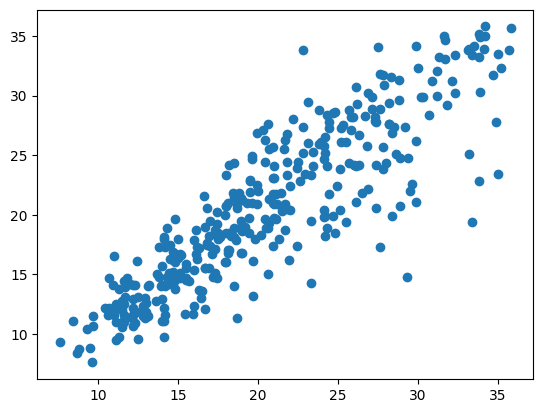

In [222]:
plt.scatter(new_df["x6"] , new_df["target"])

In [223]:
x_train , x_test , y_train , y_test = train_test_split(data_x , data_y , test_size=0.2)

In [224]:
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [225]:
model.score(x_train , y_train)

0.7854897914870305

In [226]:
model.score(x_test , y_test)

0.8061186274281731